![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data using `SMOTE`.
- Note that since `SMOTE` works on numerical data only, we will first encode the categorical variables in this case.



In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
categorical = pd.read_csv('categorical.csv')
numerical = pd.read_csv('numerical.csv')
y = pd.read_csv('target.csv')

In [8]:
y_cl = y['TARGET_B']
y_re = y['TARGET_D']

In [3]:
columns_to_encode = list(categorical.columns)
categorical_encoded = pd.get_dummies(categorical[columns_to_encode])

In [5]:
X = pd.concat([numerical, categorical_encoded], axis=1)

In [9]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y_cl)

<AxesSubplot:xlabel='TARGET_B', ylabel='count'>

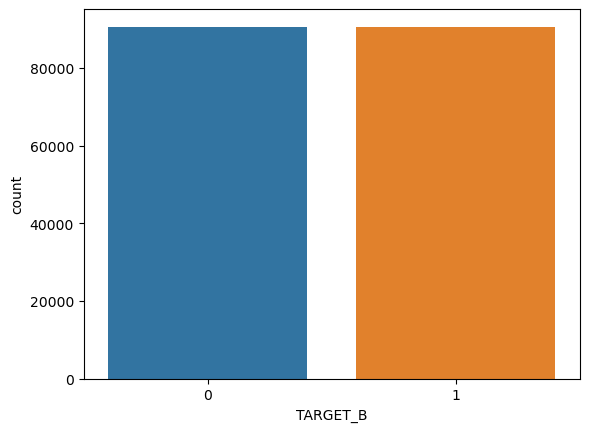

In [10]:
sns.countplot(x = y_sm, data = X_sm)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
r2 = clf2.score(X_test,y_test)
print("R2 Score (Random Forest Classifier):", r2)

NameError: name 'clf2' is not defined

In [ ]:
n_estimators = [200, 500, 1000, 2000, 4000]
min_samples_split = [2, 4, 8, 16, 32]
min_samples_leaf = [1, 2, 3, 4, 5]
max_features = ['sqrt', 'log2']
max_samples = ['None', 0.5, 0.8]

param_grid = {
    'n_estimators': [50,100],
    'min_samples_split': [2,4],
    'min_samples_leaf':[1,2]   
}

grid_search = GridSearchCV(clf,param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_

In [ ]:
clf2 = RandomForestClassifier(n_estimators= 100, min_samples_leaf=1, min_samples_split=2, random_state=0)
clf2.fit(X_train, y_train)
r2 = clf2.score(X_test,y_test)
print("R2 Score (Random Forest Classifier):", r2)

In [ ]:
clf.fit(X_train, y_train)
X_train.head()
feature_names = X_train.columns
feature_names = list(feature_names)
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
sorted = df.sort_values(by=['score_feature_importance'], ascending = False)
sorted.head(10)